# Create your own Connectivity method

Here we explain quickly how one can incorparate custom algorithms in the `spycon` pipeline. To this end we implement a pretty dumb algorithm that draws random confidence scores and weights. It is just to showcase, what is needed. 

Below we implement a class that inherits from `SpikeConnectivityInference`. In fact it is enough to implement the `__init__` and `_infer_connectivity` methods.

In [1]:
import numpy
from matplotlib import pyplot
from spycon.spycon_inference import SpikeConnectivityInference

class RandomConnectivityMethod(SpikeConnectivityInference):
    
    def __init__(self, params:dict={}):
        super().__init__(params)
        self.method = "rand"
        self.default_params = {"alpha": 0.9}
        
    def _infer_connectivity(self, times: numpy.ndarray, ids: numpy.ndarray, pairs: numpy.ndarray, **kwargs) -> tuple:
        alpha = kwargs.get("alpha", self.default_params["alpha"])
        nodes = numpy.unique(ids)
        stats = numpy.random.rand(len(pairs),1)
        weights = numpy.random.randn(len(pairs))
        stats = numpy.concatenate((pairs, stats), axis=1)
        return nodes, weights, stats, alpha
        

Using cpu device


This algorithm can be then straightforwardly applied to a `ConnectivityTest`.

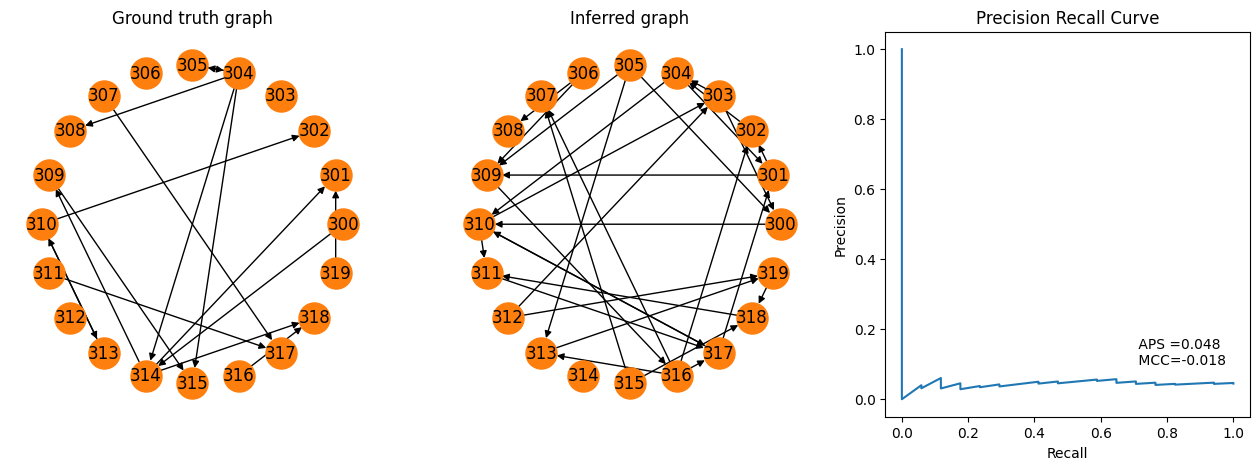

In [2]:
from spycon import load_test

spycon_test = load_test(name='sim1917Cell1Block1_tiny', path='../data/gt_data/')
rand_con_method = RandomConnectivityMethod()
spycon_result, test_metrics = spycon_test.run_test(rand_con_method, only_metrics=False, parallel=False,)

fig = pyplot.figure(figsize=(16,5))
ax1 = fig.add_subplot(131)
spycon_test.draw_graph()
pyplot.title('Ground truth graph')
ax2 = fig.add_subplot(132)
spycon_result.draw_graph(graph_type='binary', ax=ax2)
pyplot.title('Inferred graph')
ax3 = fig.add_subplot(133)
recall, precision, aps, mcc = tuple(test_metrics[['prc_recall', 'prc_precision', 'aps', 'mcc']].to_numpy()[0])
pyplot.plot(recall, precision)
pyplot.text(.7,.1,f' APS ={aps:.3f} \n MCC={mcc:.3f}')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.title('Precision Recall Curve')
pyplot.show()

Of course, results are quite bad, because it is just a random result.

__Remark__: Normally, algorithms can be parallelized over pairs, or units. If this is possible one can implement with the `_infer_connectivity_parallel` method. Check out how this cna be done in the existing methods.